In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calculate_variance(cluster):
    variance=0
    
    for i in cluster:
        variance+=(i-np.mean(cluster))**2
        
    return variance

def k_means_clustering(data,K):

    init_clusters=np.random.choice(data,K,replace=False)

    for i in range(K):
        vars()[f'cluster_{i+1}']=[init_clusters[i]]

    for i in data:
        if i not in init_clusters:
            dist=[]

            for j in range(K):
                dist.append(abs(i-np.mean(vars()[f'cluster_{j+1}'])))

            idx=dist.index(min(dist))

            vars()[f'cluster_{idx+1}'].append(i)

    total_variance=0
    CLUSTERS=[]
    
    for i in range(K):
        total_variance+=calculate_variance(vars()[f'cluster_{i+1}'])
        CLUSTERS.append(vars()[f'cluster_{i+1}'])
        
    return total_variance, CLUSTERS

In [3]:
N_RUNS=100

min_variance=10000000000
CLUSTERS_MAIN=[]

data=[2,6,4,5,9,12,68,79,150,898,34,78,57,90,113]
K=3

for _ in range(N_RUNS):
    iter_variance, iter_clusters = k_means_clustering(data,K)
    
    if (iter_variance<min_variance):
        min_variance=iter_variance
        CLUSTERS_MAIN=iter_clusters
        
CLUSTERS_MAIN

[[898], [79, 68, 150, 78, 57, 90, 113], [9, 2, 6, 4, 5, 12, 34]]

In [4]:
[[56, 34, 57], [12, 2, 6, 4, 5, 9, 14], [90, 78, 113]]

[[56, 34, 57], [12, 2, 6, 4, 5, 9, 14], [90, 78, 113]]

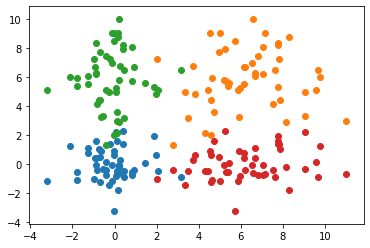

In [5]:
X1=np.random.normal(0,1,50)
Y1=np.random.normal(0,1,50)

X2=np.random.normal(6,2,50)
Y2=np.random.normal(6,2,50)

plt.scatter(X1,Y1)
plt.scatter(X2,Y2)
plt.scatter(X1,Y2)
plt.scatter(X2,Y1)

plt.show()

In [6]:
df1=pd.DataFrame(np.vstack((X1,Y1)).transpose(), columns=['X','Y'])
df2=pd.DataFrame(np.vstack((X2,Y2)).transpose(), columns=['X','Y'])
df3=pd.DataFrame(np.vstack((X1,Y2)).transpose(), columns=['X','Y'])
df4=pd.DataFrame(np.vstack((X2,Y1)).transpose(), columns=['X','Y'])

df=pd.concat([df1,df2,df3,df4],axis='rows').reset_index(drop=True)
df.head()

,X,Y
0,0.252661,0.291290
1,-0.686099,-1.236916
2,0.174650,-1.770489
3,-0.858156,-0.078810
4,-0.542972,-0.351152


In [7]:
def calculate_variance(cluster):
    xc_mean=np.mean(cluster[:,0])
    yc_mean=np.mean(cluster[:,1])
    
    variance=0
    for i in cluster:
        variance+=(i[0]-xc_mean)**2+(i[1]-yc_mean)**2
        
    return variance

def k_means_clustering(df,K):
    cluster_idx=np.random.choice(np.arange(len(df)),K,replace=False)
    for i,v in enumerate(cluster_idx):
        vars()[f'cluster_{i+1}']=df.loc[v].values.reshape(1,-1)

    for i in range(len(df)):
        if (i not in cluster_idx):

            dist=[]

            x=df.loc[i].values[0]
            y=df.loc[i].values[1]

            for j in range(K):
                
                xc_mean=np.mean(vars()[f'cluster_{j+1}'][:,0])
                yc_mean=np.mean(vars()[f'cluster_{j+1}'][:,1])

                dist.append(np.sqrt((x-xc_mean)**2+(y-yc_mean)**2))

            idx=dist.index(min(dist))

            vars()[f'cluster_{idx+1}'] = np.vstack((vars()[f'cluster_{idx+1}'],df.loc[i].values))

    total_variance=0
    CLUSTERS=[]
    
    for j in range(K):
        total_variance+=calculate_variance(vars()[f'cluster_{j+1}'])
        CLUSTERS.append(vars()[f'cluster_{j+1}'])
        
    return total_variance, CLUSTERS

In [8]:
K=4

N_RUNS=100

min_variance=100000000
CLUSTERS_MAIN=[]

for _ in range(N_RUNS):
    iter_variance, iter_clusters=k_means_clustering(df,K)
    
    if (iter_variance<min_variance):
        min_variance=iter_variance
        CLUSTERS_MAIN=iter_clusters
        
min_variance

895.1627849552344

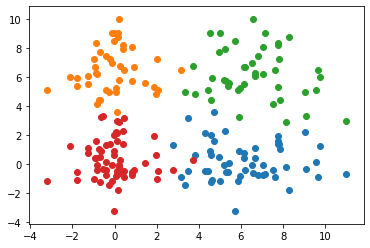

In [9]:
for c in CLUSTERS_MAIN:
    X=c[:,0]
    Y=c[:,1]
    
    plt.scatter(X,Y)
    
plt.show()